In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Reshape,Convolution2D, Flatten, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [3]:
ds = pd.read_csv('../datasets/mnist_data/train.csv')
data= ds.values
X_data= data[:10000,1:]
y_data=data[:10000,0]
print X_data.shape, y_data.shape

(10000, 784) (10000,)


In [4]:
X_data= X_data/255.0
y=np_utils.to_categorical(y_data)
print X_data.shape, y.shape

(10000, 784) (10000, 10)


In [5]:
split=int(0.85*X_data.shape[0])
X_data= X_data.reshape((X_data.shape[0],28,28,1))
X_train= X_data[:split,:]
y_train= y[:split]
X_test=X_data[split:,:]
y_test= y[split:]

In [6]:
conv_model= Sequential()

conv_model.add(Convolution2D(6,5,5,input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))
conv_model.add(Activation('relu'))


conv_model.add(Convolution2D(16,5,5))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Activation('relu'))

conv_model.add(Flatten())

conv_model.add(Dense(120))

conv_model.add(Dense(100))


conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

conv_model.summary()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 24, 24, 6)     156         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 6)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 12, 12, 6)     0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 8, 8, 16)      2416        activation_1[0][0]               
___________________________________________________________________________________________

In [7]:
hist = conv_model.fit(X_train,y_train,
                      nb_epoch=50,
                      shuffle=True,
                      batch_size=100,
                      validation_data=(X_test,y_test))

Train on 8500 samples, validate on 1500 samples
Epoch 1/50
8500/8500 [==============================] - 3s - loss: 0.8240 - acc: 0.7549 - val_loss: 0.3480 - val_acc: 0.8960

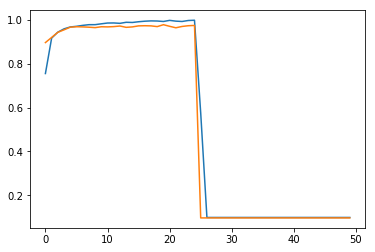

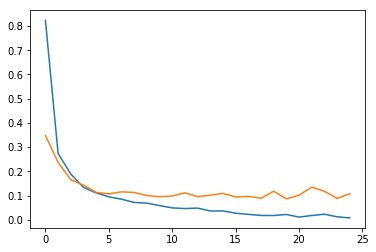

In [8]:
# Result analysis
plt.figure(0)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.show()